In [ ]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.6.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170508288/170498071 [==============================] - 3s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(i)
x = Dropout(0.5)(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Dropout(0.5)(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
1563/1563 [==============================] - 14s 8ms/step - loss: 1.2797 - accuracy: 0.5511 - val_loss: 1.1607 - val_accuracy: 0.5950
Epoch 2/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2728 - accuracy: 0.5477 - val_loss: 1.1357 - val_accuracy: 0.6039
Epoch 3/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2769 - accuracy: 0.5478 - val_loss: 1.1730 - val_accuracy: 0.5795
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2732 - accuracy: 0.5501 - val_loss: 1.1698 - val_accuracy: 0.5977
Epoch 5/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2780 - accuracy: 0.5470 - val_loss: 1.1713 - val_accuracy: 0.5979
Epoch 6/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2670 - accuracy: 0.5483 - val_loss: 1.2506 - val_accuracy: 0.5589
Epoch 7/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2691 - accuracy: 0.5481 - val_loss: 1.1714 -

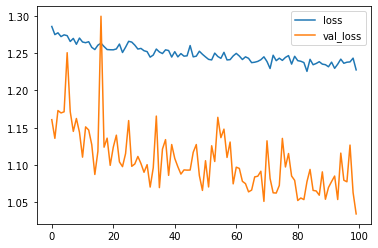

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

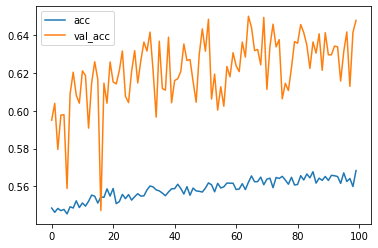

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[743  13  31  13  28  11  11  18  87  45]
 [ 10 797   3  12   5   9   7   4  35 118]
 [ 69  10 558  62 114  79  56  25  20   7]
 [ 20   9  55 466  73 259  46  50  13   9]
 [ 15   0  45  54 735  45  29  63   9   5]
 [ 12   4  37 139  54 684  13  47   4   6]
 [  6   6  29  87  58  57 738   8   8   3]
 [ 13   1  19  33  82  60   2 777   4   9]
 [ 44  25  14  11  13  14   5   6 842  26]
 [ 34  59   7  16   9  12   8  23  36 796]]


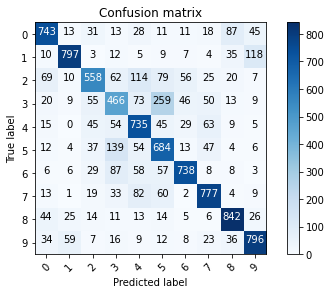

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

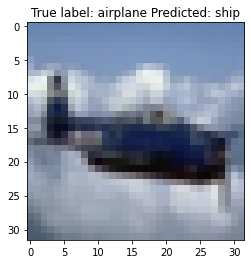

In [ ]:
# Show some misclassified examples
# TODO: add label names
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));


In [ ]:
![]('ship.jpg')